<a href="https://colab.research.google.com/github/yooshin2/Deep-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
true_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
true_y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

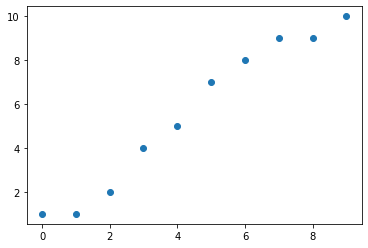

In [35]:
import matplotlib.pyplot as plt
plt.scatter(true_x, true_y)
plt.show()

In [49]:
class H():
  
    def __init__(self, w): 
        self.w = w
    
    def forward(self, x):
        return self.w * x

def cost(pred_y, true_y):
    error = 0
    for i in range(len(true_x)):
        error += (pred_y[i] - true_y[i]) ** 2
    error = error / len(true_x)
    return error

h = H(4)
pred_y = [h.forward(true_x[i]) for i in range(len(true_x))]
cost(pred_y, true_y)

222.2

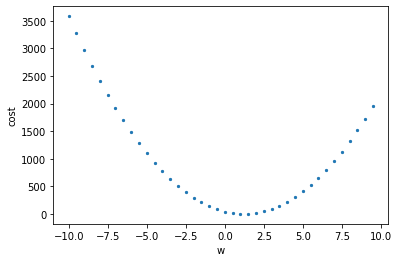

In [50]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    pred_y = [h.forward(true_x[i]) for i in range(len(true_x))]
    c = cost(pred_y, true_y)
    list_w.append(w)
    list_c.append(c)

plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=5)
plt.show()

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


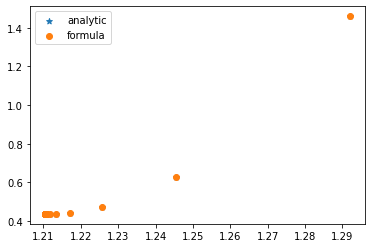

In [64]:
def cal_grad1(w):
    h = H(w)
    pred_y = [h.forward(true_x[i]) for i in range(len(true_x))]
    cost1 = cost(pred_y, true_y)
    epsil = 0.00001 
    h = H(w + epsil)
    pred_y = [h.forward(true_x[i]) for i in range(len(true_x))]
    cost2 = cost(pred_y, true_y)
    dcost = cost2 - cost1
    dw = epsil
    grad = dcost / dw

    return grad, (cost1 + cost2) / 2

def cal_grad2(w):
    h = H(w)
    pred_y = [h.forward(true_x[i]) for i in range(len(true_x))]
    grad = 0
    for i in range(len(true_y)):
        grad += 2 * (pred_y[i] - true_y[i]) * true_x[i]
    grad = grad / len(true_x)
    c = cost(pred_y, true_y)

    return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad1, mean_cost1 = cal_grad1(w1)
    grad2, mean_cost2 = cal_grad2(w2)

    w1 -= lr * grad1
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost1)
    list_c2.append(mean_cost2)

print(w1, mean_cost1, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()
plt.show()

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


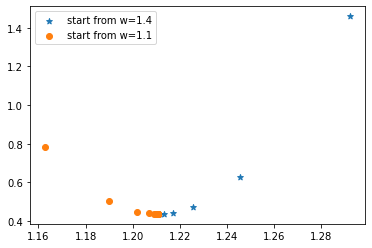

In [73]:
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad1, mean_cost1 = cal_grad2(w1)
    grad2, mean_cost2 = cal_grad2(w2)

    w1 -= lr * grad1
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost1)
    list_c2.append(mean_cost2)

print(w1, mean_cost1, w2, mean_cost2)
  
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()
plt.show()